In [71]:
#import libraries
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [72]:
#Đọc file csv
F0 = pd.read_csv('F0.csv')
F0.head(5)

,ID,HoTen,GioiTinh,Phuong,Quan,NamSinh,PhanLoai,DiaChiCQ,Ngay_KQXN,SoDT,PL_TruocXN,TC_Nha,TC_XN,NgheNghiep,DC_NoiO,KhuPho
0,1,NGUYỄN THỊ LAN ANH,NỮ,TÂN TẠO A,BÌNH TÂN,NaN,D,NaN,5/28/2021,NaN,NaN,NaN,NaN,NaN,79 TRẦN THANH MẠI,2.0
1,2,NGUYỄN THỊ LỆ HẰNG,NỮ,TÂN TẠO A,BÌNH TÂN,NaN,D,NaN,5/28/2021,NaN,NaN,NaN,NaN,NaN,77 TRẦN THANH MẠI,2.0
2,3,NGUYỄN THỊ NGỌC NGA,NỮ,TÂN TẠO A,BÌNH TÂN,NaN,D,NaN,5/28/2021,NaN,NaN,NaN,NaN,NaN,13 SỐ 1,3.0
3,4,CAO HỒNG THẮNG,NAM,TÂN TẠO A,BÌNH TÂN,NaN,D,NaN,5/29/2021,NaN,NaN,NaN,NaN,NaN,CĂN HỘ SỐ E14.02 CHUNG CƯ TECCO TOWN,4.0
4,5,CAO THỊ HỒNG OANH,NỮ,TÂN TẠO A,BÌNH TÂN,NaN,D,NaN,5/30/2021,NaN,NaN,NaN,NaN,NaN,CĂN HỘ SỐ E14.02 CHUNG CƯ TECCO TOWN,4.0


In [73]:
#Kiểm tra kiểu dữ liệu của dataframe
F0.dtypes

ID              int64
HoTen          object
GioiTinh       object
Phuong         object
Quan           object
NamSinh       float64
PhanLoai       object
DiaChiCQ       object
Ngay_KQXN      object
SoDT          float64
PL_TruocXN    float64
TC_Nha        float64
TC_XN          object
NgheNghiep    float64
DC_NoiO        object
KhuPho        float64
dtype: object

In [74]:
object()
F0.Ngay_KQXN = pd.to_datetime(F0.Ngay_KQXN)

In [75]:
F0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15633 entries, 0 to 15632
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          15633 non-null  int64         
 1   HoTen       15633 non-null  object        
 2   GioiTinh    15177 non-null  object        
 3   Phuong      15633 non-null  object        
 4   Quan        15633 non-null  object        
 5   NamSinh     14930 non-null  float64       
 6   PhanLoai    15633 non-null  object        
 7   DiaChiCQ    1 non-null      object        
 8   Ngay_KQXN   15633 non-null  datetime64[ns]
 9   SoDT        8179 non-null   float64       
 10  PL_TruocXN  0 non-null      float64       
 11  TC_Nha      0 non-null      float64       
 12  TC_XN       7474 non-null   object        
 13  NgheNghiep  0 non-null      float64       
 14  DC_NoiO     15602 non-null  object        
 15  KhuPho      15603 non-null  float64       
dtypes: datetime64[ns](1), 

In [76]:
#Kiểm tra xem có giá trị null không
F0.isnull().sum()

ID                0
HoTen             0
GioiTinh        456
Phuong            0
Quan              0
NamSinh         703
PhanLoai          0
DiaChiCQ      15632
Ngay_KQXN         0
SoDT           7454
PL_TruocXN    15633
TC_Nha        15633
TC_XN          8159
NgheNghiep    15633
DC_NoiO          31
KhuPho           30
dtype: int64

In [77]:
#Thay thế các null
F0 = F0.fillna("null")
F0

,ID,HoTen,GioiTinh,Phuong,Quan,NamSinh,PhanLoai,DiaChiCQ,Ngay_KQXN,SoDT,PL_TruocXN,TC_Nha,TC_XN,NgheNghiep,DC_NoiO,KhuPho
0,1,NGUYỄN THỊ LAN ANH,NỮ,TÂN TẠO A,BÌNH TÂN,null,D,null,2021-05-28,null,null,null,null,null,79 TRẦN THANH MẠI,2.0
1,2,NGUYỄN THỊ LỆ HẰNG,NỮ,TÂN TẠO A,BÌNH TÂN,null,D,null,2021-05-28,null,null,null,null,null,77 TRẦN THANH MẠI,2.0
2,3,NGUYỄN THỊ NGỌC NGA,NỮ,TÂN TẠO A,BÌNH TÂN,null,D,null,2021-05-28,null,null,null,null,null,13 SỐ 1,3.0
3,4,CAO HỒNG THẮNG,NAM,TÂN TẠO A,BÌNH TÂN,null,D,null,2021-05-29,null,null,null,null,null,CĂN HỘ SỐ E14.02 CHUNG CƯ TECCO TOWN,4.0
4,5,CAO THỊ HỒNG OANH,NỮ,TÂN TẠO A,BÌNH TÂN,null,D,null,2021-05-30,null,null,null,null,null,CĂN HỘ SỐ E14.02 CHUNG CƯ TECCO TOWN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15628,16619,LÊ PHƯỚC TRÍ,NAM,TÂN TẠO A,BÌNH TÂN,1988.0,D,null,2021-08-28,null,null,null,null,null,52 TRẦN THANH MẠI,2.0
15629,16620,NGÔ THỊ AN,NỮ,BÌNH TRỊ ĐÔNG A,BÌNH TÂN,1997.0,D,null,2021-08-28,null,null,null,null,null,878/13 HƯƠNG LỘ 2,10.0
15630,16621,NGUYỄN NGỌC HUYỀN MY,NỮ,BÌNH TRỊ ĐÔNG A,BÌNH TÂN,2011.0,D,null,2021-08-28,null,null,null,null,null,198A MÃ LÒ,6.0
15631,16622,NGUYỄN CHÍ THÔNG,NAM,BÌNH TRỊ ĐÔNG A,BÌNH TÂN,1984.0,D,null,2021-08-28,null,null,null,null,null,198A MÃ LÒ,6.0


In [78]:
#Thống kê F0 theo ngày:
F0.Ngay_KQXN.value_counts()

2021-07-20    882
2021-07-27    842
2021-07-24    626
2021-07-22    585
2021-08-27    526
             ... 
2021-06-04      2
2021-06-09      2
2021-06-03      1
2021-05-31      1
2021-05-29      1
Name: Ngay_KQXN, Length: 92, dtype: int64

In [79]:
F0.Ngay_KQXN = F0.Ngay_KQXN.apply(lambda x: x.strftime('%Y-%m-%d'))
time_index = []
for i in F0.Ngay_KQXN.unique():
    time_index.append(i)

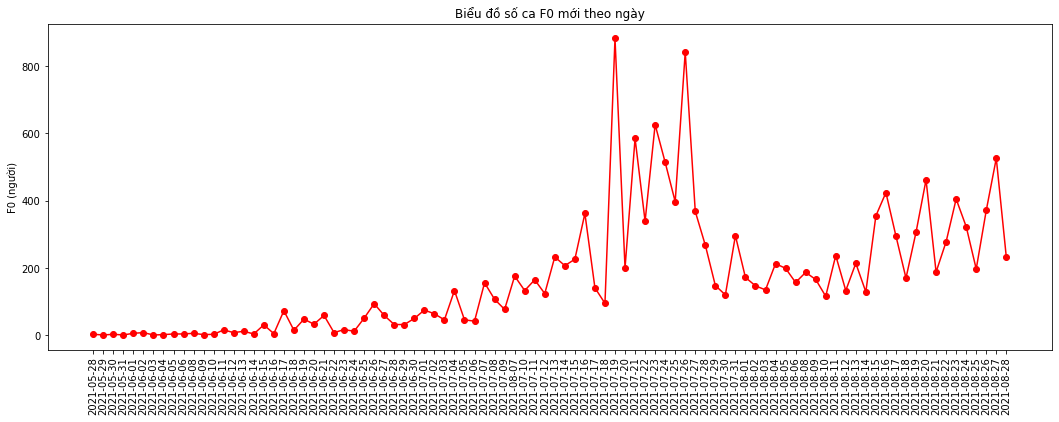

In [80]:
#Biểu đồ F0 mới theo ngày
plt.figure(figsize = (18,6))
plt.plot(time_index, F0.groupby(['Ngay_KQXN']).size(), "ro-")
plt.title("Biểu đồ số ca F0 mới theo ngày")
plt.xticks(rotation = 90)
plt.ylabel("F0 (người)")
plt.show()

In [81]:
sum = np.cumsum(F0.groupby('Ngay_KQXN').size())

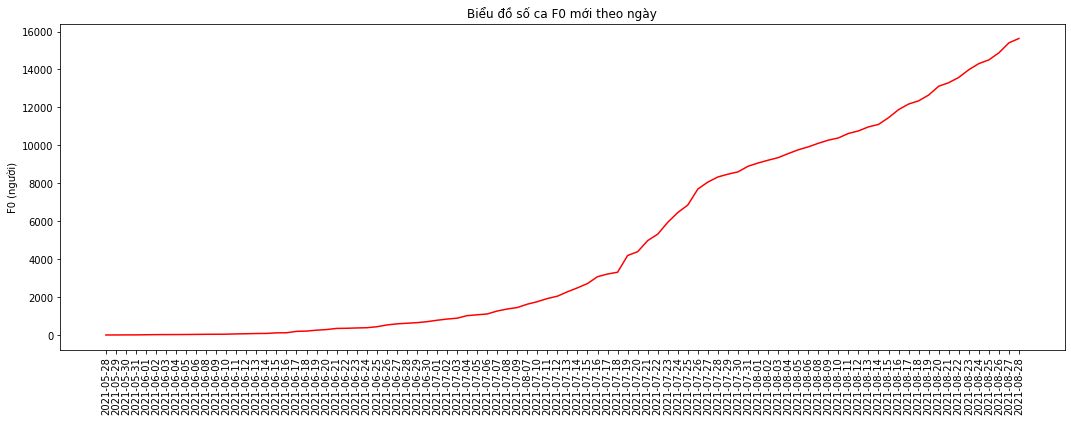

In [82]:
#Biểu đồ lũy tích F0 theo ngày
plt.figure(figsize = (18,6))
plt.plot(time_index, sum, "r-")
plt.title("Biểu đồ số ca F0 mới theo ngày")
plt.xticks(rotation = 90)
plt.ylabel("F0 (người)")
plt.show()

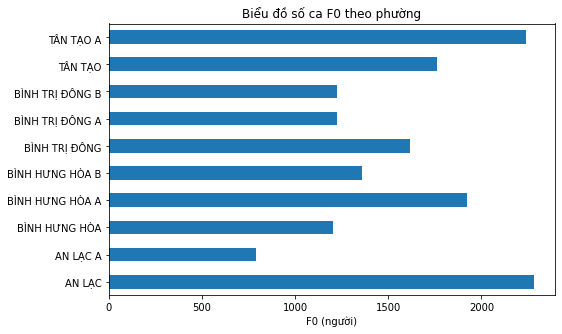

In [84]:
#Biểu đồ thống kê F0 theo phường
plt.figure(figsize = (8,5))
F0.groupby('Phuong').size().plot.barh()
plt.title("Biểu đồ số ca F0 theo phường")
plt.xlabel("F0 (người)")
plt.ylabel(None)
plt.show()

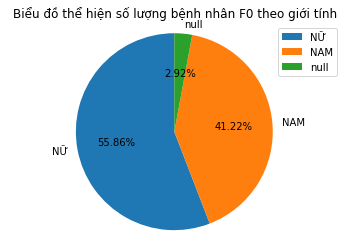

In [85]:
#Biểu đồ thống kê F0 theo giới tính
plt.figure()
plt.pie(F0.GioiTinh.value_counts(), labels = F0.GioiTinh.unique(), autopct = '%1.2f%%', startangle = 90)
plt.axis('equal')
plt.title("Biểu đồ thể hiện số lượng bệnh nhân F0 theo giới tính")
plt.legend()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

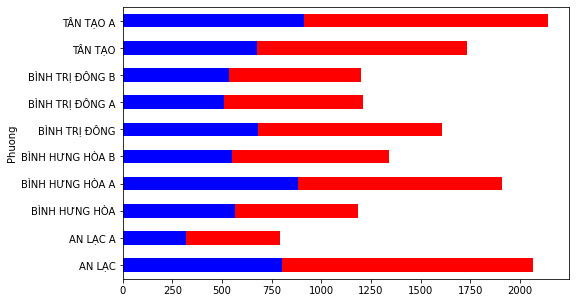

In [95]:
#Biểu đồ F0 phân giới tính theo các phường
male = F0.loc[F0.GioiTinh == "NAM"].groupby('Phuong')
female = F0.loc[F0.GioiTinh == "NỮ"].groupby('Phuong')
null = F0.loc[F0.GioiTinh == "null"].groupby('Phuong')

plt.figure(figsize = (8,5))
# F0.groupby('Phuong').size().plot.barh(label = 'null', color = 'green')
male.size().plot.barh(label = 'Nam', color = 'blue')
female.size().plot.barh(label = 'Nữ', color = 'red', left = male.size())
null.size().plot.barh(label = 'null', color = 'green', left = (male.size() + female.size()))
plt.title("Biểu đồ số lượng F0 theo giới tính ở từng phường")
plt.xlabel("F0 (người)")
plt.ylabel(None)
plt.legend()
plt.show()

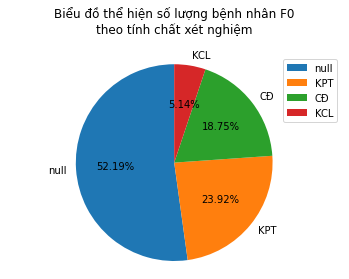

In [87]:
#Biểu đồ thống kê F0 theo tính chất xét nghiệm
plt.figure()
plt.pie(F0.TC_XN.value_counts(), labels = F0.TC_XN.unique(), autopct = '%1.2f%%', startangle = 90)
plt.axis('equal')
plt.title("Biểu đồ thể hiện số lượng bệnh nhân F0\ntheo tính chất xét nghiệm\n")
plt.legend()
plt.show()